# Economics Problem 4
### Shekhar kumar

The problem can be thought of as the worker declining the higher wage, w, wrt to the unemployment benefit,b, in this period in the expectation that the next period it will get further higher wage.

To formulate the Bellman we can think of expected utility to the worker if it takes up the current wage offer, w, from this period onwards forever.

In this case the utility to the worker is 

$$ V^E = w + \beta w + \beta^2 w + \beta^3 w + ... $$

$$ \Rightarrow $$

$$ V^E = \frac {w}{1-\beta} $$

In case the worker decides not to take the wage offer, it will get an unemployment benefit of b, followed by the wage of next period w,

$$ V^U = b + \beta E[ V^E ( w, \epsilon)] $$

The Bellman equation can be written as 

$$ V(w,\epsilon) = \max_w \{V^E(w,\epsilon), V^U(w,\epsilon)\} $$


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import ar1_approx as ar1
# to print plots inline
%matplotlib inline

In [2]:
# Declare parameters
# Preference parameters
beta = 0.96
#size_eps = 40  # number of grid points in epsilon-space
size_b = 50
b = np.linspace(.05, 1, size_b)
mu_eps = 0
rho_eps = 0.0
sigma_v = 0.15


'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
ub_wa      = scalar, upper bound of wage grid 
size_wa    = integer, number of grid points in wage state space
wa_grid    = vector, size_w x 1 vector of wage grid points 
------------------------------------------------------------------------
'''

size_wa = 100  # Number of grid points


'''
Create grid of taste shocks
'''
import ar1_approx as ar1
ln_eps_grid, pi_t = ar1.addacooper(size_wa, mu_eps, rho_eps, sigma_v)
wa_grid = np.exp(ln_eps_grid)
prob = np.transpose(pi_t)
u =  wa_grid/(1-beta)

In [3]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
PF_discrete = matrix, matrix of policy function: eat=1, not eat=0 
Vstore      = array, stores V at each iteration 
VFiter      = integer, current iteration number
EV          = scalar, expected value function for a given state
U_eat       = matrix, utility from eating cake now
Vwait       = matrix, value of waiting to eat the cake
VF          = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 2000 
V = np.zeros((size_wa,size_b)) # initial guess at value function
TV = np.zeros((size_wa,size_b))
PF_discrete = np.zeros((size_wa,size_b))
Vstore = np.zeros(( size_wa, size_b,VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_wa): # loop over wage
        for j, b_val in enumerate(b):
            EU = 0
            for ii in range(size_wa):  # loop over epsilon'
                EU += prob[i, ii] * V[ii,j]   # note can move one space because of how we constructed grid
            U_emp = u[i]
            Vwait = b_val + beta * EU 
            TV[i,j] = max(U_emp, Vwait)
            PF_discrete[i,j] = U_emp >= Vwait  # = 1 if accept the present wage offer
            
    Vstore[:,:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 3


In [4]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_wa = wa_grid[np.argmax(PF_discrete, axis=0)]

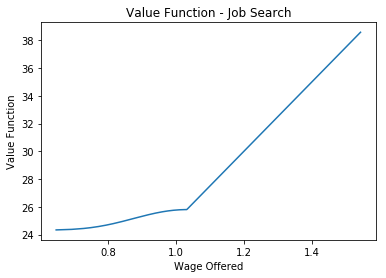

In [9]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(wa_grid[:], VF[:,1])
plt.xlabel('Wage Offered')
plt.ylabel('Value Function')
plt.title('Value Function - Job Search')
plt.show()

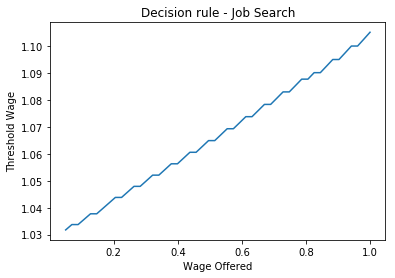

In [6]:
# Plot threshold
plt.figure()
plt.plot(b[:], threshold_wa[:])
plt.xlabel('Wage Offered')
plt.ylabel('Threshold Wage')
plt.title('Decision rule - Job Search')
plt.show()